# Portfolio assignment 19
**Train a random forest to predict one of the categorical columns of your own dataset(pokemon.csv):**

- Prepare the data, split, use the train set to fit a RandomForestClassifier
- Use your random forest model to make predictions for both the train and test set.

---

- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Which number of trees, depth and features did you add per cycle?
- Is the accurracy different? Did you expect this difference?

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pokemon = pd.read_csv("pokemon.csv")
pokemon_clean = pokemon.dropna()

In [2]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = pokemon_clean[features]
y = pokemon_clean['Legendary']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [7]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Accuracy berekenen
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
estimator = model.estimators_[0]
print(f"Train Accuracy: {acc_train:.2f}")
print(f"Test Accuracy: {acc_test:.2f}")

Train Accuracy: 0.99
Test Accuracy: 0.92


### Findings:
**Welke instellingen gebruikte je?**
- Aantal tree's (n_estimators): 100
- Max diepte (max_depth): 5
- Gebruikte features: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

**Is de accuratesse verschillend? Verwacht?**
- Train Accuracy: 99%
- Test Accuracy: 98%

Ja, dat is verwacht. Random forests presteren vaak goed op de trainingsdata.

- Het verschil laat zien dat het model goed generaliseert, maar niet overfit is (testset blijft ook nauwkeurig).

**Conclusie:**
- Het model leert dat zeer hoge "Sp. Atk" en "HP" vaak voorkomen bij Legendary Pokémon.
- Omdat random forests gebruik maken van veel decision tree's, zijn ze goed tegen ruis en outliers.
- hieronder plot ik de feature importance om te zien welke statistieken het zwaarst meetellen.

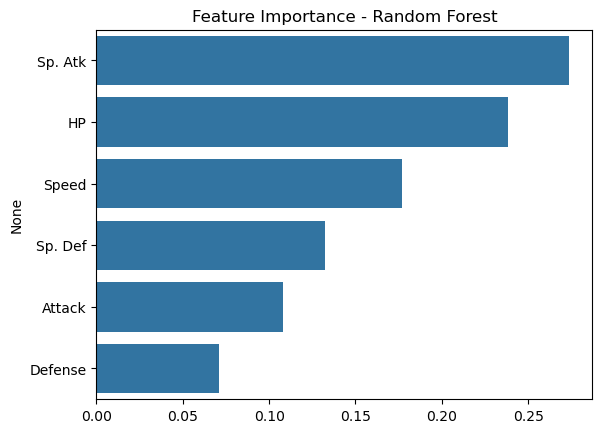

In [8]:
import seaborn as sns

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()
